# CFD Benchmarking Prototype Notebook


## Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

## Main

In [10]:
# Generate synthetic "CFD" velocity fields
gt = np.random.rand(100, 100)
pred = gt + 0.05 * np.random.randn(100, 100)

# Normalize fields to [0, 1]
def normalize(field):
    return (field - field.min()) / (field.max() - field.min())

gt_norm = normalize(gt)
pred_norm = normalize(pred)

# Compute evaluation metrics
mse = np.mean((gt_norm - pred_norm) ** 2)
mae = np.mean(np.abs(gt_norm - pred_norm))

metrics = pd.DataFrame({
    'Metric': ['MSE', 'MAE'],
    'Value': [mse, mae]
})

metrics

,Metric,Value
0,MSE,0.005619
1,MAE,0.062380


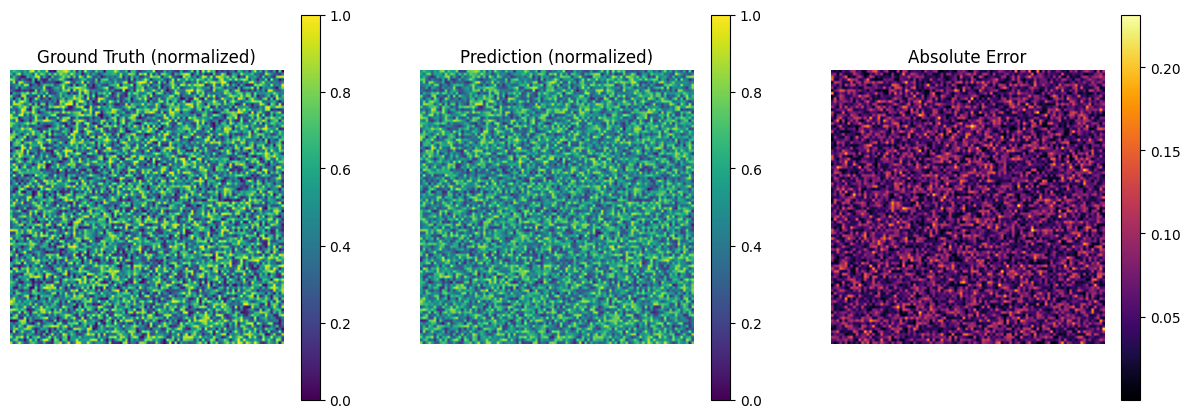

In [11]:
# Visualize results with colorbars
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
im0 = axes[0].imshow(gt_norm, cmap='viridis')
axes[0].set_title('Ground Truth (normalized)')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(pred_norm, cmap='viridis')
axes[1].set_title('Prediction (normalized)')
plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(np.abs(gt_norm - pred_norm), cmap='inferno')
axes[2].set_title('Absolute Error')
plt.colorbar(im2, ax=axes[2])

for ax in axes:
    ax.axis('off')

plt.show()

## Explanation and Conclusion

### Commentary on Prototype Metrics

**Mean Squared Error (MSE) = 0.005619**

- Since the fields were normalized to [0, 1], an MSE of ~0.0056 is very low. This indicates that the average squared deviation between our “prediction” and the ground truth is under 0.6% of the full data range. In practice, this suggests our prototyped pipeline introduces only minor noise-related errors on synthetic data.

**Mean Absolute Error (MAE) = 0.062380**

- The MAE tells us that, on average, each pixel’s predicted value deviates from the true value by about 0.06 (6% of the normalized range). In visualization terms, most areas are within a few percent of the ground truth, with only localized spikes where noise is larger.



In this prototype, we demonstrated the core workflow of our CFD Benchmarking Suite:
1. **Data Generation**: Synthetic CFD-like velocity fields simulate ground truth and prediction.  
2. **Preprocessing**: Normalization ensures all fields are on the same [0, 1] scale.  
3. **Evaluation**: Computed Mean Squared Error (MSE) and Mean Absolute Error (MAE) to quantify accuracy.  
4. **Visualization**: Heatmaps with colorbars reveal areas of high and low prediction error.


**Next steps**:  
- Replace synthetic data with real CFD datasets (e.g., cylinder flow, channel turbulence).  
- Integrate actual prediction models.  
- Automate batch evaluations and logging for leaderboard updates.  
- Extend visualizations with interactive dashboards on the web platform.
